# **Neural Network Model Training using Pytorch**
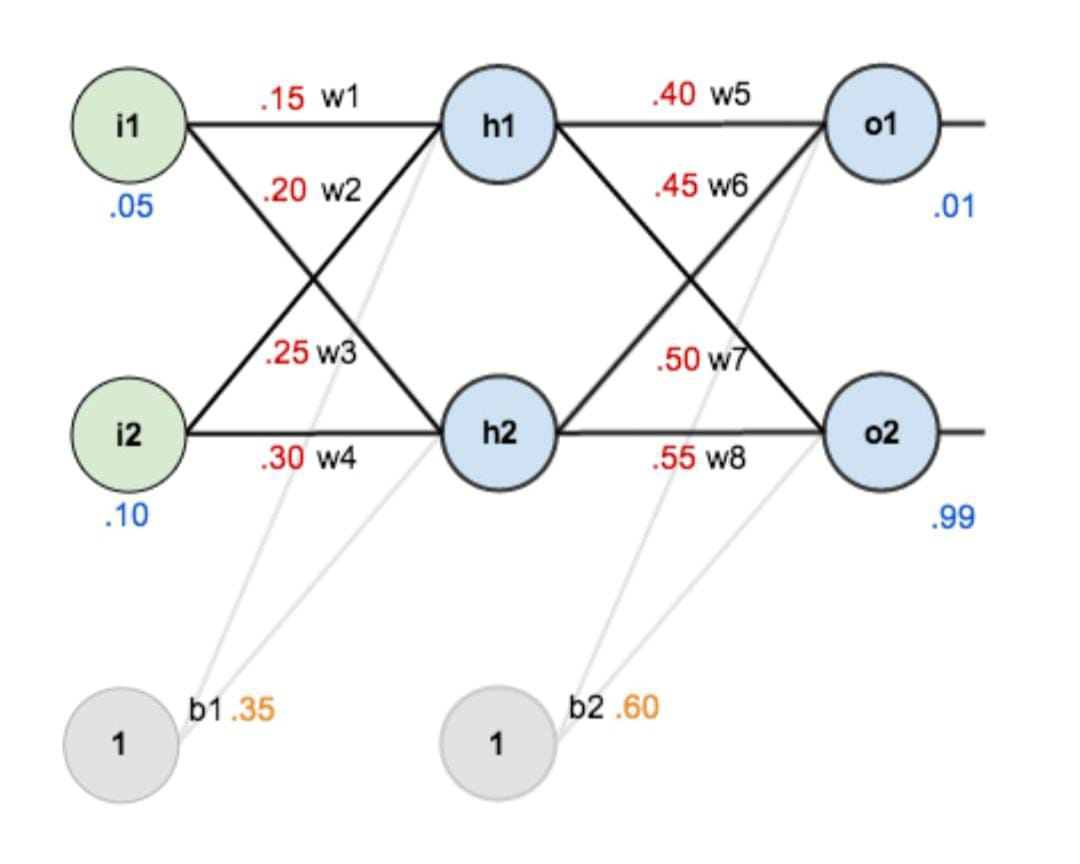

# **Importing libraries**

In [ ]:
# Imoorting Numpy and Pytorch
import numpy as np
import torch

# **Input Paramters**

In [ ]:
# Inputs in numpy array and then convert numpy to tensor and print both inputs
i = np.array([0.05,0.1], dtype='float32')
i = torch.from_numpy(i)
print("Given inputs of neural network : ", i)

Given inputs of neural network :  tensor([0.0500, 0.1000])


# **Weights**

In [ ]:
# Weights
w1 = torch.tensor([[0.15,0.25],[0.20,0.30]],requires_grad=True)
w2 = torch.tensor([[0.40,0.50],[0.45,0.55]],requires_grad=True)
print("Weights for Hidden Layer : ",w1)
print("Weights for Output Layer : ",w2)

Weights for Hidden Layer :  tensor([[0.1500, 0.2500],
        [0.2000, 0.3000]], requires_grad=True)
Weights for Output Layer :  tensor([[0.4000, 0.5000],
        [0.4500, 0.5500]], requires_grad=True)


# **Bias Term**

In [ ]:
# Biases
b1 = torch.tensor(0.35)
b2 = torch.tensor(0.60)
print("Biases value for both layer : ", b1,b2)

Biases value for both layer :  tensor(0.3500) tensor(0.6000)


# **Target Output**

In [ ]:
# Targets in numpy array and then convert numpy to tensor and print both inputs
t = np.array([.01, .99],dtype='float32')
t = torch.from_numpy(t)
print("Target Output of the Neural Network : ",t)

Target Output of the Neural Network :  tensor([0.0100, 0.9900])


# **Forward Pass**

In [ ]:
#ForwardPass model
def forwardmodel(inputs):
  net_h = inputs @ w1 + b1
  out_h = 1 / (1+torch.exp(-1*net_h))
  net_o = out_h @ w2 +b2
  out_o = 1 / (1+torch.exp(-1*net_o))
  return out_o

The @ symbol here likely represents matrix multiplication. In the context of neural networks, matrix multiplication is used to calculate the weighted sum of inputs.

In [ ]:
# Generate predictions
prediction = forwardmodel(i)
print("Predicted Output : ", prediction)

Predicted Output :  tensor([0.7514, 0.7729], grad_fn=<MulBackward0>)


# **Error Calculation**
$Total Error = \frac{1}{2}{\sum{(\text{Target output - Calculated Output})^2}}$

In [ ]:
# Mean Squared Error loss
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff ** 2) / diff.numel()

In [ ]:
# Compute loss
Et = mse(prediction, t)
print("Error between predicted value and the targeted value : ",Et)

Error between predicted value and the targeted value :  tensor(0.2984, grad_fn=<DivBackward0>)


# **Learning Rate**

In [ ]:
# Learning rate Value
alpha = torch.tensor(0.5)
print("Leraning Rate : ",alpha)

Leraning Rate :  tensor(0.5000)


# **Backward Pass**

**Computing derivatives**

In [ ]:
# Computing gradients
Et.backward()

In [ ]:
# Gradients for weights
print(w1.grad)
print(w2.grad)

tensor([[0.0004, 0.0005],
        [0.0009, 0.0010]])
tensor([[ 0.0822, -0.0226],
        [ 0.0827, -0.0227]])


**Update weights value**

In [ ]:
# Updating weights value
with torch.no_grad():
    w1 -= w1.grad * alpha
    w2 -= w2.grad * alpha
    print("Updated weights after first iteration")
    print("w1 = ",w1)
    print("w2 = ",w2)

Updated weights after first iteration
w1 =  tensor([[0.1498, 0.2498],
        [0.1996, 0.2995]], requires_grad=True)
w2 =  tensor([[0.3589, 0.5113],
        [0.4087, 0.5614]], requires_grad=True)


In [ ]:
# Calculating error with updated value
prediction = forwardmodel(i)
print("Updated Predicted Value : ",prediction)
Et = mse(prediction,t)
print("Updated Error Value : ",Et)

Updated Predicted Value :  tensor([0.7421, 0.7753], grad_fn=<MulBackward0>)
Updated Error Value :  tensor(0.2910, grad_fn=<DivBackward0>)


During backpropagation, gradients are accumulated as the computation proceeds through the network. If we do not reset the gradients to zero after each iteration, the gradients from previous iterations would continue to accumulate, leading to incorrect updates of the model parameters.

In [ ]:
# Clearing grad values
w1.grad.zero_()
# b1.grad.zero_()
w2.grad.zero_()
# b2.grad.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [ ]:
# Train for 100 epochs
for j in range(100):
    prediction = forwardmodel(i)
    Et = mse(prediction, t)
    Et.backward()
    with torch.no_grad():
        w1 -= w1.grad * alpha
        w2 -= w2.grad * alpha
        w1.grad.zero_()
        w2.grad.zero_()
print("Updated Value after 100 iteration")
print(w1)
print(w2)
print(prediction)
print(Et)

Updated Value after 100 iteration
tensor([[0.1915, 0.2901],
        [0.2831, 0.3803]], requires_grad=True)
tensor([[-1.8205,  1.1241],
        [-1.7838,  1.1778]], requires_grad=True)
tensor([0.1758, 0.8777], grad_fn=<MulBackward0>)
tensor(0.0200, grad_fn=<DivBackward0>)
